In [ ]:
# default_exp stability_margins

# Gain and Phase Margins

Given an LTI system with transfer function: $G(s) = C(sI - A)^{-1}B$

and an input signal: $u(t)=Asin(\omega t)$

Assuming that the system is **asymptotically stable**, it is possible to verify that: 

$$y(t)=A|G(j\omega)|sin(\omega t + \angle G(j\omega) ) $$


This means that the output $y(t)$ converges to a sinusoidal signal that has the **same frequency** of the input, and that has magnitude $A|G(j\omega)|$ and is shifted in phase by $\angle G(j\omega)$.

Note also that this is true independently of the initial state $x_0$. In fact, since the system is asymptotically stable, the effect of the initial state on the output will go to zero.

<tr>
<td> <img src="img/26.freq-response.png" alt="freq-response.png" style="width: 550px;"/> </td>
</tr>

As a result:
- Magnitude can change
- Phase can change

- Gain: magnitude of output wrt magnitude of input
- Phase: shift of the signal (measured as angles or relative to the signal wavelength)
   - delay in the signal is a negative phase sift (convention)
   
- The output of a single input frequency is a combination of gain and phase shift
- Gain and Phase depends on the frequency (can be different at different frequencies)
   - See Bode Plots.
   
- When we talk about gain and phase margins we need to consider all frequencies

See also notebook `06_Intro_to_freq_response_and_bode_plots`

## Margins

Informal definition: extra amount of a quantity that we can use if needed

Gain and Phase margin: extra gain or phase that we have available before the system starts to oscillates or become unstable

- Robustness of the system
- Makes it possible to quantify how stable a system is
  - Systems (or designs) that have less margin could be considered as being "less" stable: smaller variations in the system could lead to instability
  
  
### Why do we need margins

- When we design a control system we use a model
- Test is done in known conditions
- We make assumptions on how the system behaves 
- Things rarely behave the way we expect!
- This leads to gain and phase errors

If we think of a brushless DC motor:
- Rotor inertia is different: commanded torque generates a different acceleration (gain error)
- Power is sensitive to temperature (gain error)
- Higher drag in bearing: motor is slower to respond (gain and phase error)
- Slower computer: adds delay (phase error)
- etc.

**These are called Process Variations**: We want our controller to be robust to these because we cannot know our system perfectly and hence we need margins.

The more uncertainty we have the more margin we should design in.

## What makes a system unstable

- $G(s)$ is unstable if at least one pole (root of the characteristic eq.) is in the RHP (Re $>$ 0 )
- We usually design the open loop system and then we use Bode, Nyquist, Root Locus to assess the closed loop stability and performance
- For this reason is useful to link the open loop performance to their closed loop ones.

## What makes an open loop system, unstable in closed loop

Given a system $G(s)$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/59.feedback-error.png" alt="59.feedback-error" style="width: 500px;"/> </td>
</tr>
</table>

We know that the closed loop equivalent is:

$$
G_{c}(s) = \frac{G(s)}{1+G(s)}
$$


- $G_{c}(s)$ must have a pole in the RHP
- For this to happen we know that $1+G(s)=0$ or $G(s)=-1$
- We should keep our open loop $G(s)$ away from -1 then!

- We saw this already with Nyquist

It is useful to consider the $-1$ system in more details:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/-1-system.png" alt="-1-system" style="width: 200px;"/> </td>
</tr>
</table>


- Gain is 1 (0 $dB$)
- Phase is $-180^o$

- If our system, at any one frequency produces 0 $dB$ **and** a phase of $-180^o$, then it is unstable
- Our system must stay away from that point throughout the frequency spectrum

Margin: how far away our system is from the $0dB$ and $-180^o$ point

## Bode Plot

- Start identifying our point on the diagrams:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/61.stability_margins-bode-0.png" alt="img/61.stability_margins-bode-1.png" style="width: 500px;"/> </td>
</tr>
</table>

- Let's now suppose to increase gain

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/62.stability-margin-increase-gain.png" alt="62.stability-margin-increase-gain" style="width: 500px;"/> </td>
</tr>
</table>


- Increasing gain, does not modify the phase
- The crossover frequency moves closer to where the phase diagram crosses the $-180^o$ point.
- Our system has become less stable

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/61.stability_margins-bode-1.png" alt="img/61.stability_margins-bode-1.png" style="width: 500px;"/> </td>
</tr>
</table>

- If we choose the gain $K$ wrongly the system becomes unstable

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/63.stability_margins-bode-2-1.png" alt="img/63.stability_margins-bode-2.png" style="width: 500px;"/> </td>
</tr>
</table>

- The gain required is the gain at the $-180^o$ frequency. This is the **gain margin**.



- Similarly for the phase (e.g., slower computers would add a delay which only affects the phase)

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/64.stability_margins-bode-phase-margin-1.png" alt="img/64.stability_margins-bode-phase-margin-1.png" style="width: 500px;"/> </td>
</tr>
</table>


- **Phase margin**: how much phase delay takes to make $-180^o$ phase at the 0 $dB$ gain frequency. 
- $90^o$ in our toy example
- Easy to read the gain and phase margin directly from the Bode plot

### Python Control Library: Stability Margins

In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np

Let's define the open loop transfer function:

In [ ]:
G = control.tf([1.3, 2], [1, 1, 6, 1])
print(G)


     1.3 s + 2
-------------------
s^3 + s^2 + 6 s + 1



We can now call the `bode_plot` function of the Python Control Library to plot the Bode plots.

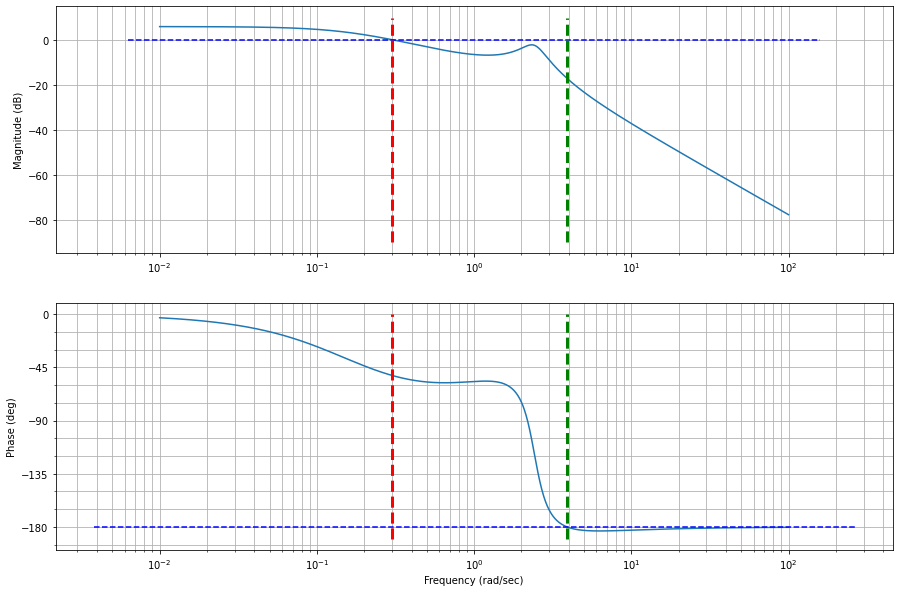

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(G, dB=True);


# Let's also plot lines corresponding to the 0 dB point (gain plot), and the -180 deg point (phase plot)
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--')
plt.plot([0.3, 0.3],[-90, 10],'r--', linewidth=3)
plt.plot([3.9, 3.9],[-90, 10],'g--', linewidth=3)

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180, -180],'b--')
plt.plot([0.3, 0.3],[-190, 0],'r--', linewidth=3)
plt.plot([3.9, 3.9],[-190, 0],'g--', linewidth=3)

- Approximately 130 deg of phase margin (red)
- Approximately 15 dB of gain margin (green)

The command `margin` returns the gain and phase margins, and the corresponding crossover frequencies.

**Note: gain value returned by the `margin` command is not in dB**

In [ ]:
gm, pm, wpc, wgc = control.margin(G);
print('Gain Margin {:.2f} at frequency (rad/sec) {:.2f}'.format(gm, wpc))
print('Gain Margin (dB) {:.2f} at frequency (rad/sec) {:.2f}'.format(20*np.log10(gm), wpc))
print('Phase Margin {:.2f} (deg) at frequency (rad/sec) {:.2f}'.format(pm, wgc))

Gain Margin 7.14 at frequency (rad/sec) 3.91
Gain Margin (dB) 17.08 at frequency (rad/sec) 3.91
Phase Margin 127.69 (deg) at frequency (rad/sec) 0.31


### Additional comments
- Gain and phase margin refers to margin in the whole open loop system
- Uncertainty in one specific parameters can affect you more than you think.
- Try and change on of the parameters of the denominator of the $G(s)$ above and see what happens

For example, consider what happens with the following transfer function:

In [ ]:
G1 = control.tf([1.3, 2], [1, 1, 2, 1])
print(G1)


     1.3 s + 2
-------------------
s^3 + s^2 + 2 s + 1



In [ ]:
gm, pm, wpc, wgc = control.margin(G1);
print('Gain Margin {:.2f} at frequency (rad/sec) {:.2f}'.format(gm, wpc))
print('Gain Margin (dB) {:.2f} at frequency (rad/sec) {:.2f}'.format(20*np.log10(gm), wpc))
print('Phase Margin {:.2f} (deg) at frequency (rad/sec) {:.2f}'.format(pm, wgc))

Gain Margin 1.43 at frequency (rad/sec) 1.96
Gain Margin (dB) 3.10 at frequency (rad/sec) 1.96
Phase Margin 5.04 (deg) at frequency (rad/sec) 1.79


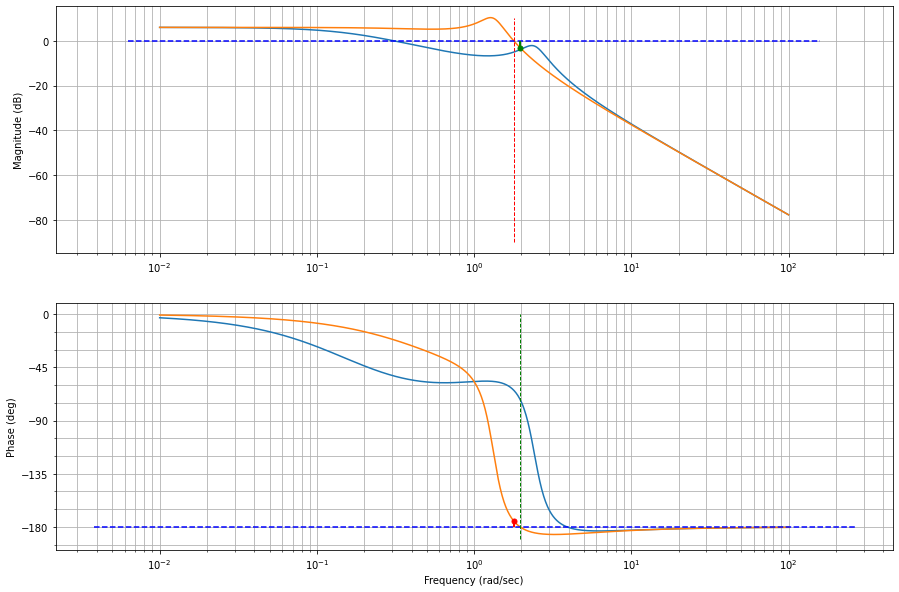

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(G, dB=True);
control.bode_plot(G1, dB=True);


# Let's also plot lines corresponding to the 0 dB point (gain plot), and the -180 deg point (phase plot)
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--')
plt.plot([1.79, 1.79],[-90, 10],'r--', linewidth=1)
plt.plot([1.96, 1.96],[-3.10, 0],'g--', linewidth=2)
plt.plot([1.96],[-3.10],'g.', markersize=10)

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180, -180],'b--')
plt.plot([1.79, 1.79],[-180, -180+5.04],'r--', linewidth=2)
plt.plot([1.79],[-180+5.04],'r.', markersize=10)
plt.plot([1.96, 1.96],[-190, 0],'g--', linewidth=1)

Effectively we have substantially reduced our stability margins.

### Reading stability margins: misleading values

Let's now consider the following transfer function:

In [ ]:
G2 = control.tf([0.38, 0.038, 0.38*0.55], [1, 1.06, .56, 0.5, 0])
print(G2)


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



And as before we can plot the Bode plots and verify what stability margins we have:

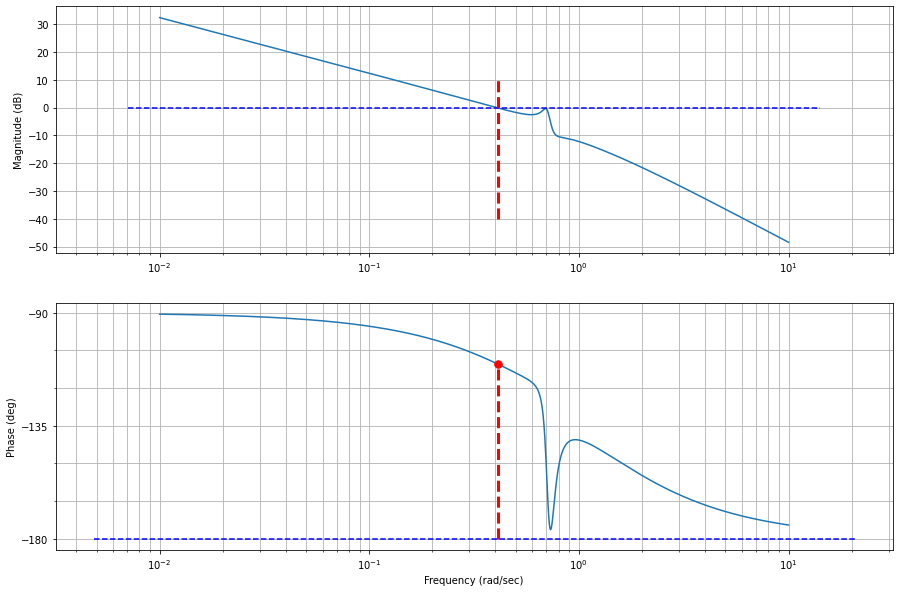

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(G2, dB=True);


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--')
plt.plot([0.41, 0.41],[-40, 10],'r--', linewidth=3)

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180, -180],'b--')
plt.plot([0.41, 0.41],[-180, -180+69.77],'r--', linewidth=3)
plt.plot([0.41],[-180+69.77],'r.', markersize=15, linewidth=3)

- **Infinite gain margin**: phase diagram never crosses the -180 deg. This would mean that you can add any gain you desired and the closed loop system would never go unstable.

- Phase margin is approximately: 70 deg

We can confirm this with the Python Control Library:

In [ ]:
gm, pm, wpc, wgc = control.margin(G2);
print('Gain Margin {:.2f} at frequency (rad/sec) {:.2f}'.format(gm, wpc))
print('Gain Margin (dB) {:.2f} at frequency (rad/sec) {:.2f}'.format(20*np.log10(gm), wpc))
print('Phase Margin {:.2f} (deg) at frequency (rad/sec) {:.2f}'.format(pm, wgc))

Gain Margin inf at frequency (rad/sec) nan
Gain Margin (dB) inf at frequency (rad/sec) nan
Phase Margin 69.77 (deg) at frequency (rad/sec) 0.41


- However, consider the dip in the phase plot: a small phase lag into the system it would bring the phase diagram to cross the -180 deg line, and the gain, for that frequency is very close to 0dB.
- We do not have 70deg of phase margin, in practise we only have ~2 deg.
- This are important considerations when designing a controller

## Using the Nyquist Plot and the System Sensitity Revised

To try an understand what is happening a little more, let's draw the Nyquist plot:


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/stability-margin-nyquist-1.png" alt="59.feedback-error" style="width: 500px;"/> </td>
</tr>
</table>



- No amount of gain can move the plot around -1 (the gain is 0 when the plot crosses the real axis)
- In addition to the gain and phase margins we can consider the behaviour of the point that is closer to the -1 point. 
- Process variations that affect that part of the plot are worse than pure gain or phase alone.
- This is where the sensitivity function of the system can help us.

We saw that the sensitivity function is:

$$
S(s) = \frac{1}{1+RG}
$$

- Describes how feedback influences the disturbances
- If $|RG|$ is large at frequencies where the power of the disturbance is concentrated, then $|S|$ is small and the effect of the disturbance on the output is attenuated
- Lower values of $|S|$ means higher attenuation of the external disturbance.
- Typically, plan disturbances are low frequency, and one would like $|RG|$ to be large at low frequency

See notebook `08_Main_types_of_loops_and_transfer_functions`.

We can also define the _Nominal Sensitivity Peak_:

$$
M_s = \max_{0 \leq \omega \leq \infty} | S(j\omega) | = \max_{0 \leq \omega \leq \infty} \Big| \frac{1}{1+R(j\omega)G(j\omega)} \Big|
$$

### Closest point of the Nyquist plot to -1

- This is the point that is most in danger of causing instability
- Rember that the Nyquist plot shows the open loop transfer function: $R(j\omega)G(j\omega)$
- We want to calculate the minimum distance between -1 and the curve $R(j\omega)G(j\omega)$: 

$$
d = \min(|R(j\omega)G(j\omega) - (-1)|)
$$

- Note that if we use the metric above, we have something that tells us _the smaller the number is the larger its sensitivity to variations_ (similar to robustness)
- If we take the reciprocal insted we have a metric such that _the larger it is, the larger the sensitivity_

$$
\max_{-\infty < \omega < \infty} \Big| \frac{1}{R(j\omega)G(j\omega) +1} \Big|
$$


- Since Nyquist is symmetrical w.r.t the real axis we can restrict it to ${0 \leq \omega \leq \infty}$.

- We have now a new definition for our sensitivity function: **it is the minimum distance between the point -1 and the Nyquist curve of $R(j\omega)G(j\omega)$**

Let's now consider the block diagram of a standard "servo" or tracking configuration of classical feedback control:

<tr>
    <!--td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td-->
    <td> <img src="img/system-generic.png" alt="system-generic" style="width: 550px;"/> </td>
</tr>

Let's restrict ourselves to the inputs $y_{ref}$ and $d$. In this case we saw that we can write:

$$
Y(s) = \frac{RG}{1+RG}Y_{ref}(s) + \frac{1}{1+RG}D(s)
$$

- As we saw the sensitivity function captures what happens to the system when we have disturbances or process variation
- We can determine sensitivity across the entire spectrum using the Bode plot.

Let's revisit our system

In [ ]:
G2 = control.tf([0.38, 0.038, 0.38*0.55], [1, 1.06, .56, 0.5, 0])
print(G2)


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



We can calculate the sensitivity function 
$$
\frac{1}{1+G}
$$

as:

In [ ]:
sensitivity = control.tf([1, 53/50, 14/25, 0.5], [1, 1.0595, 0.94, 0.5378, 0.2090])   
print(sensitivity)


       s^3 + 1.06 s^2 + 0.56 s + 0.5
--------------------------------------------
s^4 + 1.06 s^3 + 0.94 s^2 + 0.5378 s + 0.209



Text(0.8, 13, 'Max sensitivity')

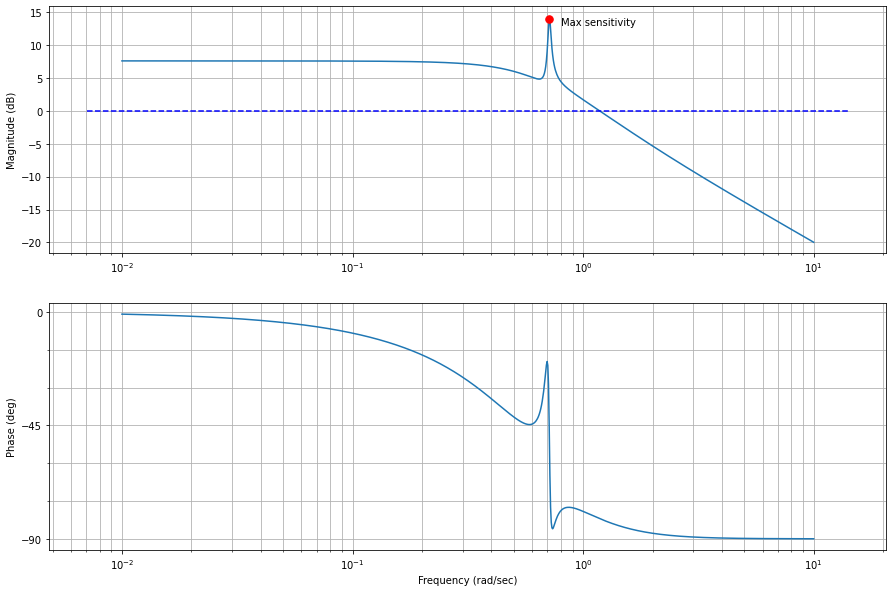

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(sensitivity, dB=True);

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--') # 0 dB line
plt.plot([0.71],[14],'r.', markersize=15, linewidth=3)
plt.text(0.8, 13, 'Max sensitivity');

- The Max Sensitivity Peak is approximately $13$ dB
- If we convert it back out of dB: 10^(13/20) = 4.5
- This is a very high value - Typical sensitivity peak should stay between 1.3 and 2

Can we improve?

- Half the gain

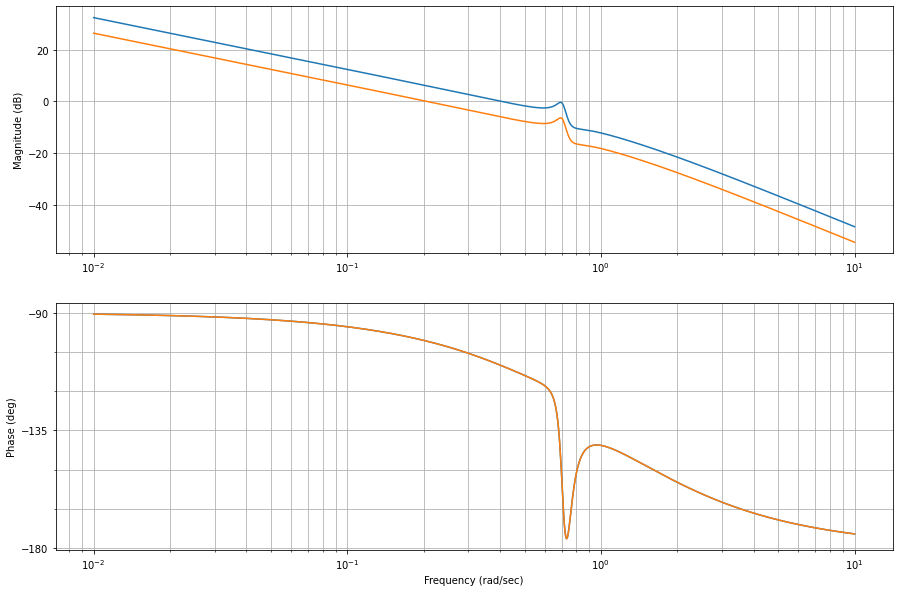

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(G2, dB=True);
control.bode_plot(0.5*G2, dB=True);

- The gain plot in the open loop dropped by 2 or 6 dB

We can calculate the sensitivity function 
$$
\frac{1}{1+0.5*G}
$$

Note that we cannot simply multiply the previous sensitivity by 0.5. It matters where the gain is!

In [ ]:
new_sensitivity = control.tf([1, 1.06, 0.56, 0.5, 0], 
                             [1, 1.05995, 0.749986425, 0.518980167284, 0.104492961264])

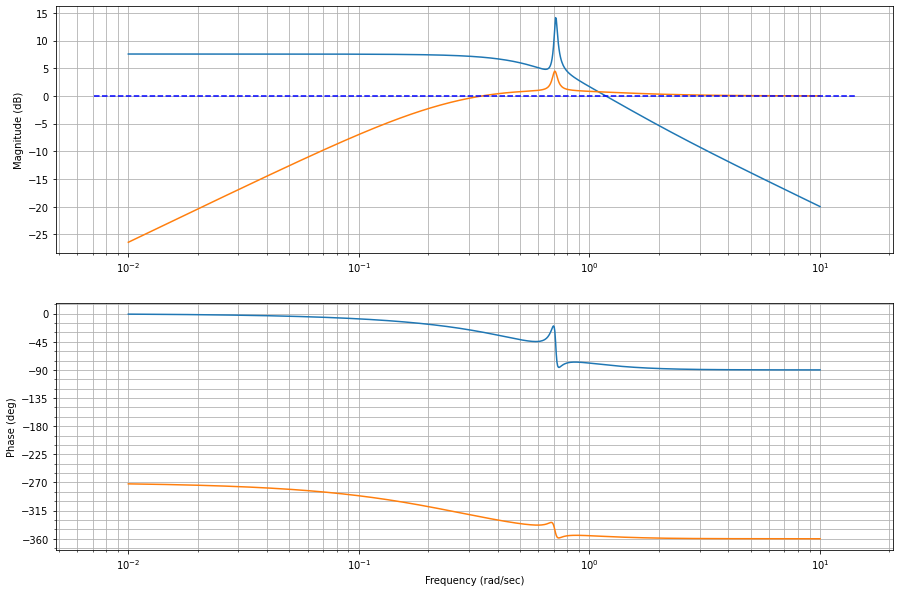

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(sensitivity, dB=True); # omega_limits=[0.5, 1]
control.bode_plot(new_sensitivity, dB=True);

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--'); # 0 dB line
#plt.plot([0.71],[14],'r.', markersize=15, linewidth=3)
#plt.text(0.8, 13, 'Max sensitivity');

- We substantially improved the sensitivity
- Peak now less than 5 dB
- Which corresponds to 1.7

What did we do to our system? Let's now analyse the step response

In [ ]:
t, yout = control.step_response(G2/(1+G2))

t_new, yout_new = control.step_response(0.5*G2/(1+0.5*G2))

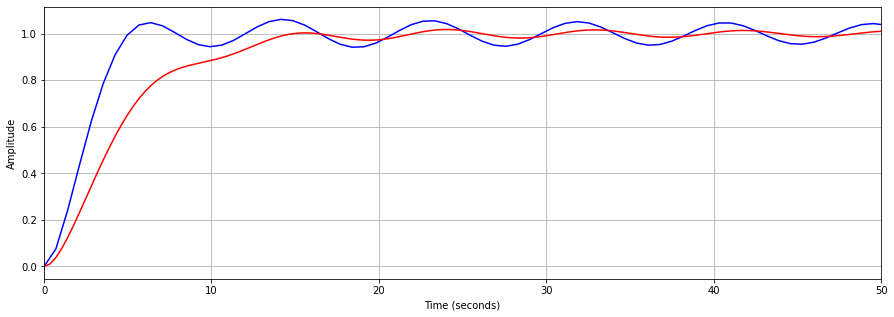

In [ ]:
fig = plt.figure(figsize=(15, 5))

plt.plot(t, yout, 'b')
plt.plot(t_new, yout_new, 'r')
plt.xlim(0, 50)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid();

- We have slowed down the response of the system. The rise time is now much slower.
- Reducing the gain across the frequency spectrum, affects low frequencies, which determine our rise time and our ability to follow slow moving reference signals

Can we do better?

Let's apply a more complex controller (more to come later):

In [ ]:
notch = control.tf([1, 0, 0.7**2], [1, 0.7/2, 0.7**2])
# notch = (s**2 + 0.7**2)/(s**2 + 0.7/2*s + 0.7**2)
#formally this is a notch filter centered at 0.7 rad/s with a Q = 2. 
# This is pretty steep, so it should only affect a narrow frequency range

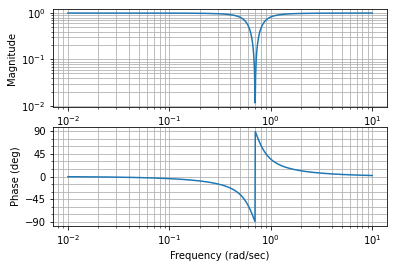

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(notch);

Let's see the bode plot of the new system

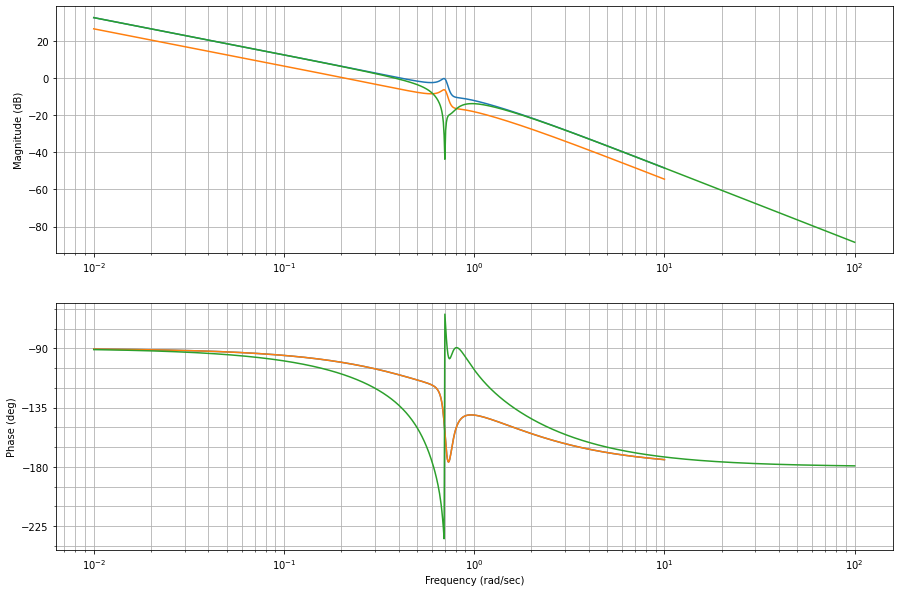

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(G2, dB=True);
control.bode_plot(0.5*G2, dB=True);
control.bode_plot(notch*G2, dB=True);

- As expected only frequencies around 0.7 rad/s are affected.

We can calculate the new sensitivity function:

$$
 S = \frac{1}{1+notch \cdot G}
$$

In [ ]:
notch_sensitivity = control.tf([1, 1.41, 1.421, 1.2154, 0.4494, 0.245, 0], 
                               [1, 1.40979, 1.801045539, 1.253306815398, 0.8446772388437, 0.263622089835, 0.10243055628])

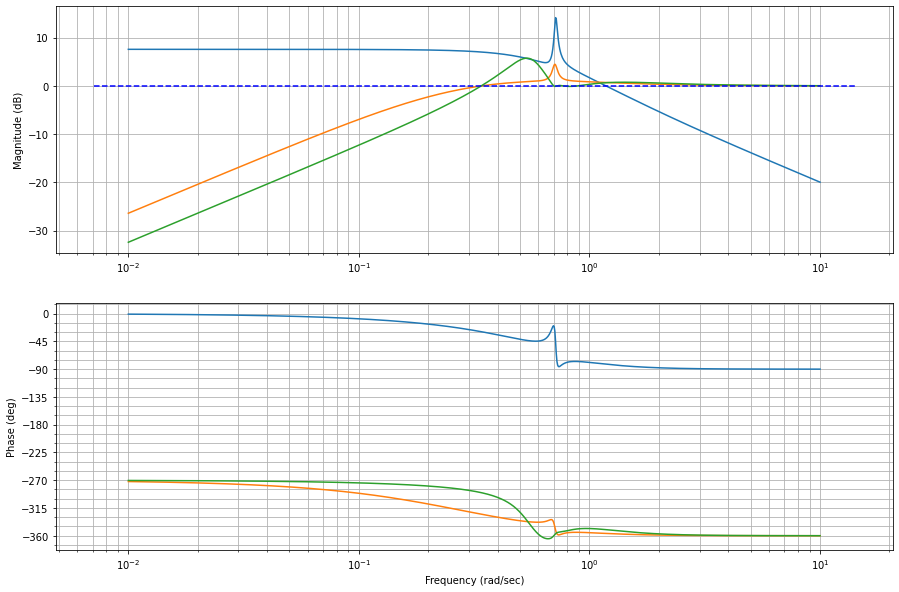

In [ ]:
fig = plt.figure(figsize=(15, 10))
control.bode_plot(sensitivity, dB=True); # omega_limits=[0.5, 1]
control.bode_plot(new_sensitivity, dB=True);
control.bode_plot(notch_sensitivity, dB=True);

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'b--'); # 0 dB line

- The sensitivity peak has been moved to lower frequencies, but it still around $5$ dB

In [ ]:
t_notch, yout_notch = control.step_response(notch*G2/(1+notch*G2))

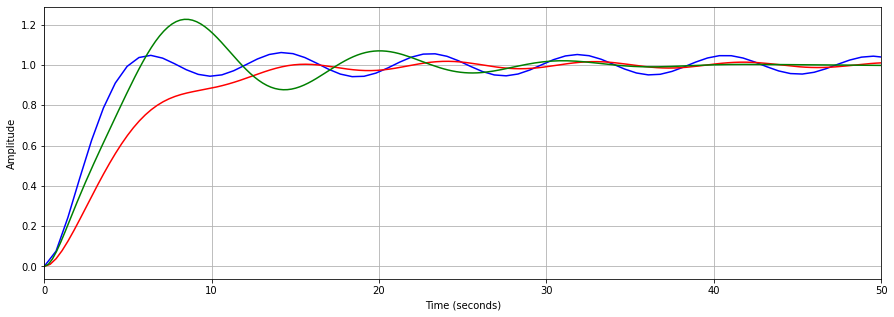

In [ ]:
fig = plt.figure(figsize=(15, 5))

plt.plot(t, yout, 'b')
plt.plot(t_new, yout_new, 'r')
plt.plot(t_notch, yout_notch, 'g')

plt.xlim(0, 50)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid();

- The step response rise time is now closer to our original rise time
- The notch filter is not affecting low frequencies as much as the simple constant gain did

- Much more methods can be used and we will investigate other methods in the future
- Depends on performance requirements
- But also on the complexity of the control that we can have

- Regardless of the method however, taking into account the sensitivity is important!

### Considerations on stability margins, relative stability and Nyquist plots

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt
import control

Let's consider two systems:

In [ ]:
G1 = control.tf([1], [30, 5, 4])
G2 = control.tf([1], [2, 5, 4])

print('G1:', G1), print('G2:', G2);

G1: 
       1
----------------
30 s^2 + 5 s + 4

G2: 
       1
---------------
2 s^2 + 5 s + 4



Poles of the system `G1`

In [ ]:
np.roots([30, 5, 4])

array([-0.08333333+0.35551215j, -0.08333333-0.35551215j])

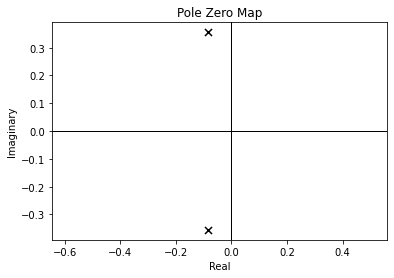

In [ ]:
control.pzmap(G1, plot=True);

Poles of the system `G2`

In [ ]:
np.roots([2, 5, 4])

array([-1.25+0.66143783j, -1.25-0.66143783j])

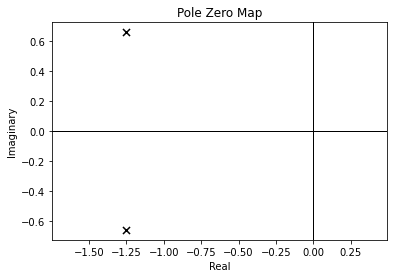

In [ ]:
control.pzmap(G2, plot=True);

To confirm, let's evaluate the step response of the two systems:

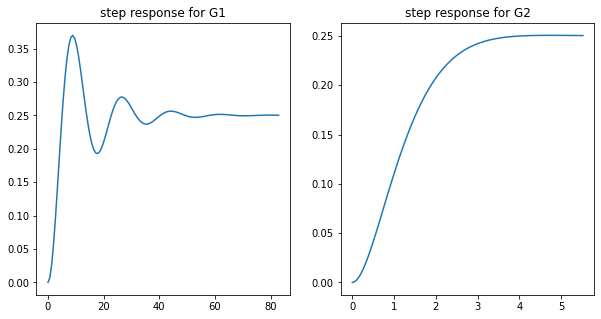

In [ ]:
# Step response
t1, y1 = control.step_response(G1)
t2, y2 = control.step_response(G2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(t1, y1)
axs[0].set_title('step response for G1')
axs[1].plot(t2, y2)
axs[1].set_title('step response for G2');

#### Let's now look at the Nyquist plots

In [ ]:
print('G1:', G1), print('G2:', G2);

G1: 
       1
----------------
30 s^2 + 5 s + 4

G2: 
       1
---------------
2 s^2 + 5 s + 4



 - 1. $|G|$ and $\angle G$ at $\omega=0$ (start of the plot)
 - 2. $|G|$ and $\angle G$ at $\omega=\infty$ (mid point of the plot)
 - 3. Intersections with the imaginary axis 
 - 4. Intersections with the real axis 

------------------

<tr>    
    <td> <img src="img/nyquist-relative-stability.png" alt="nyquist-relative-stability.png" style="width: 700px;"/> </td>
</tr>


For the system `G1`:

0

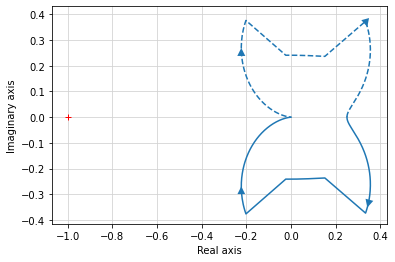

In [ ]:
control.nyquist_plot(G1)

0

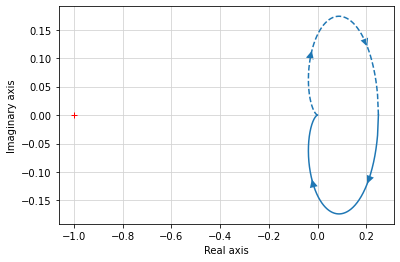

In [ ]:
control.nyquist_plot(G2)